In [102]:
# first compile the c modules where the model depends on
from  explain_core.ModulesCompiler import compile_modules;
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# enable or disable the physiological submodels
neo.ans(False)
neo.breathing(False)
neo.metabolism(False)
neo.mob(True)

# desiable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)

# atria
models["LA"].u_vol = 0.0
models["RA"].u_vol = 0.0
models["LA"].el_min = 650       # 650 
models["RA"].el_min = 650       # 650
models["LA"].el_max = 1500      # 1500
models["RA"].el_max = 1500      # 1500

# ventricles
models["LV"].u_vol = 0.0025
models["RV"].u_vol = 0.0025
models["LV"].el_min = 500       # 500
models["RV"].el_min = 500       # 500
models["LV"].el_max = 14500    # 14500
models["RV"].el_max = 14500     # 14500

# stabilize by calculating 60 seconds with fixed resp_rate of 40/min, tidal volume of 16 ml and fixed heart rate of 140 / min
neo.calculate(60)
neo.analyze(["LA.vol", "LV.vol"], time_to_calculate=60, weight_based=True)
# neo.analyze_heart()
# neo.plot_time_graph(["LA_LV.flow","RA_RV.flow"], combined=False, sharey=False, time_to_calculate=2, fill=False, sampleinterval=0.0005)
# LA.vol          : max    2.55126, min    1.42837 ml/kg
# LV.vol          : max    4.01551, min    2.28378 ml/kg

# target data
# LA 1.4 - 0.77
# LV 2.51 - 0.78

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 2.2 sec. Average model step in 0.0182 ms.

LA.vol          : max    2.55126, min    1.42837 ml/kg
LV.vol          : max    4.01551, min    2.28378 ml/kg


{'LA.vol.max': 2.55126,
 'LA.vol.min': 1.42837,
 'LV.vol.max': 4.01551,
 'LV.vol.min': 2.28378}

In [103]:
neo.analyze_heart()


LA_LV.flow      : net  242.44357, forward  242.44357, backward        0.0 ml/kg/min, stroke volume:    1.73173 ml/kg, 
RA_RV.flow      : net  242.44357, forward  242.44357, backward        0.0 ml/kg/min, stroke volume:    1.73173 ml/kg, 
RV_PA.flow      : net  242.41968, forward  242.41968, backward        0.0 ml/kg/min, stroke volume:    1.73155 ml/kg, 
LV_AA.flow      : net  242.41379, forward  242.41379, backward        0.0 ml/kg/min, stroke volume:    1.73151 ml/kg, 
IVCI_RA.flow    : net  134.13261, forward  136.92705, backward   -2.79444 ml/kg/min, stroke volume:    0.95808 ml/kg, 
SVC_RA.flow     : net   105.3878, forward   107.9587, backward    -2.5709 ml/kg/min, stroke volume:    0.75276 ml/kg, 
LA.pres_in      : max    8.17315 min    3.33313
RA.pres_in      : max    6.68754 min    2.75745
LV.pres_in      : max   75.08414 min    2.54307
RV.pres_in      : max   43.45581 min    1.48677
AA.pres_in      : max   74.83016 min   50.14208
IVCI.pres_in    : max    5.79871 min    5.557

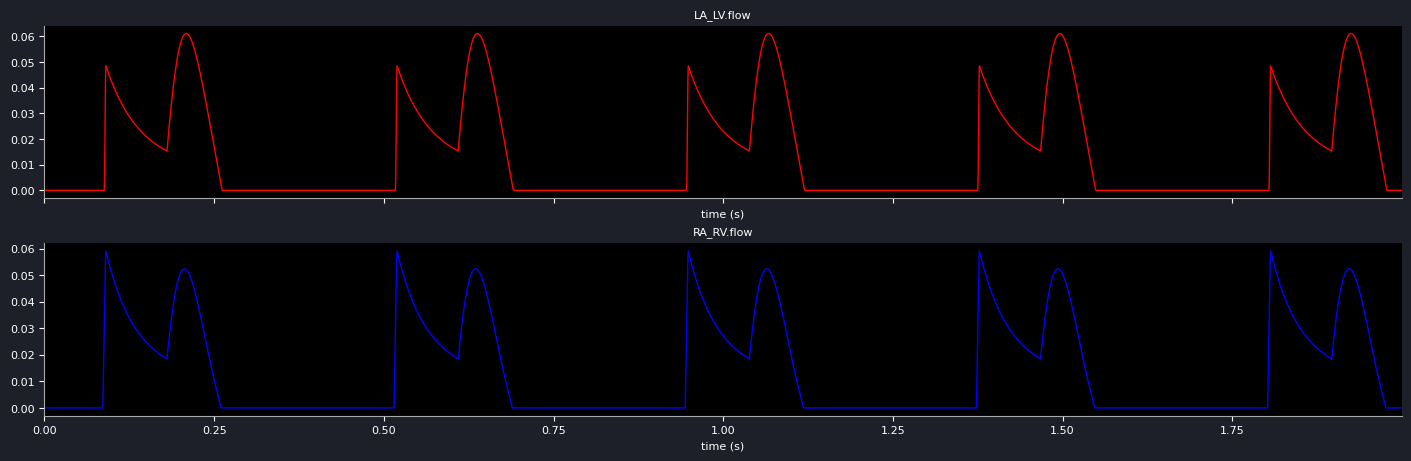


LA_LV.flow      : net  857.41816, forward  857.41816, backward        0.0 ml/min, stroke volume:    5.71469 ml, 
RA_RV.flow      : net  857.41814, forward  857.41814, backward        0.0 ml/min, stroke volume:    5.71469 ml, 


In [104]:
neo.plot_time_graph(["LA_LV.flow","RA_RV.flow"], combined=False, sharey=False, time_to_calculate=2, fill=False, sampleinterval=0.0005)

Target data (Functional cardiac MRI in preterm and term newborns. Arch Dis Child Fetal Neonatal Ed 2011;96:F86–F91. doi:10.1136/adc.2010.189142. Groves et al.)

LV EDV  2.51    ml/kg 
LV ESV  0.78    ml/kg 
SV      1.73    ml/kg  
HF      140     bpm 
LVO     222-245 ml/kg/min
RVO     219     ml/kg/min
SVC     95      ml/kg/min
DAo     126     ml/kg/min

Target data (Left atrial volume assessed by transthoracic three dimensional echocardiography and magnetic resonance imaging: dynamic changes during the heart cycle in children. Heart 2000;83:537–542. Poutanen et al.)

LA ESV  22.1    ml/bsa = 1.4 ml/kg       (bsa 0.214, weight 3.3 kg, length 50 cm)
LA EDV  11.9    ml/bsa = 0.77 ml/kg      (bsa 0.214, weight 3.3 kg, length 50 cm)